In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
jjii = xr.open_dataset('~/MEOPAR/grid/grid_from_lat_lon_mask999.nc')

In [3]:
# grab Ben's code, remove tqdm
def build_GEM_mask(grid_GEM, grid_NEMO, mask_NEMO):
    """
    """

    # Evaluate each point on GEM grid
    mask_GEM = np.empty_like(grid_GEM['nav_lon'])
    
    print(grid_GEM['nav_lon'].shape)
    
    for ig in range(0, grid_GEM['nav_lon'].shape[1]):
        if int(ig/20)*20 == ig:
            print (ig)
        for jg in range(0, grid_GEM['nav_lon'].shape[0]):
            lon = grid_GEM['nav_lon'][jg, ig] - 360
            lat = grid_GEM['nav_lat'][jg, ig]

        # Find closest NEMO ji point
            method = 'nearest'
            jj = jjii.jj.sel(lats=lat, lons=lon, method=method).item()
            ii = jjii.ii.sel(lats=lat, lons=lon, method=method).item()
        # Append to list
            if jj == -999 or ii == -999:
                mask_GEM[jg, ig] = 0
            else:
                mask_GEM[jg, ig] = mask_NEMO[jj, ii].values

    return mask_GEM

## OPS FILES ##

In [4]:
mask_NEMO = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
grid_NEMO = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
grid_GEM = xr.open_dataset('/results/forcing/atmospheric/continental2.5/nemo_forcing/hrdps_y2023m03d01.nc')

In [5]:
grid_GEM

<xarray.Dataset>
Dimensions:           (time_counter: 24, x: 190, y: 230)
Coordinates:
  * y                 (y) int64 0 1 2 3 4 5 6 7 ... 223 224 225 226 227 228 229
  * x                 (x) int64 0 1 2 3 4 5 6 7 ... 183 184 185 186 187 188 189
  * time_counter      (time_counter) datetime64[ns] 2023-03-01 ... 2023-03-01...
    nav_lon           (y, x) float64 ...
    nav_lat           (y, x) float64 ...
Data variables:
    LHTFL_surface     (time_counter, y, x) float32 ...
    PRATE_surface     (time_counter, y, x) float32 ...
    RH_2maboveground  (time_counter, y, x) float32 ...
    atmpres           (time_counter, y, x) float32 ...
    precip            (time_counter, y, x) float32 ...
    qair              (time_counter, y, x) float32 ...
    solar             (time_counter, y, x) float32 ...
    tair              (time_counter, y, x) float32 ...
    therm_rad         (time_counter, y, x) float32 ...
    u_wind            (time_counter, y, x) float64 ...
    v_wind            (time_counter, y, x) float64 ...
Attributes: (12/15)
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             UBC EOAS
    ...                      ...
    creator_name:            SalishSeaCast Project Contributors
    creator_email:           sallen at eoas.ubc.ca
    creator_url:             https://salishsea.eos.ubc.ca
    drawLandMask:            over
    coverage_content_type:   modelResult
    history:                 [Tue 2023-03-14 13:57:33 -07:00] python3 -m nowc...

In [6]:
mask_GEM = build_GEM_mask(grid_GEM, grid_NEMO, mask_NEMO.tmask.isel(t=0, z=0))

(230, 190)
0
20
40
60
80
100
120
140
160
180


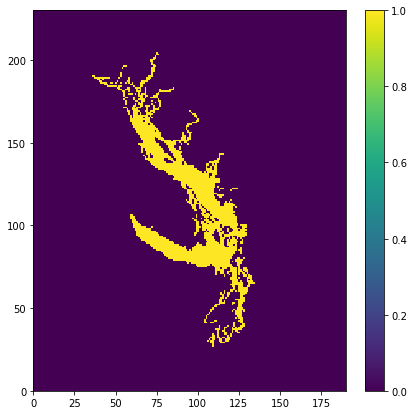

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
colors = ax.pcolormesh(mask_GEM)
fig.colorbar(colors);

In [12]:
grid_GEM['mask'] = (('y', 'x'), mask_GEM)

In [13]:
grid_GEM

<xarray.Dataset>
Dimensions:           (time_counter: 24, x: 190, y: 230)
Coordinates:
  * y                 (y) int64 0 1 2 3 4 5 6 7 ... 223 224 225 226 227 228 229
  * x                 (x) int64 0 1 2 3 4 5 6 7 ... 183 184 185 186 187 188 189
  * time_counter      (time_counter) datetime64[ns] 2023-03-01 ... 2023-03-01...
    nav_lon           (y, x) float64 233.7 233.7 233.8 ... 239.1 239.1 239.1
    nav_lat           (y, x) float64 46.12 46.13 46.13 ... 51.77 51.77 51.77
Data variables:
    LHTFL_surface     (time_counter, y, x) float32 ...
    PRATE_surface     (time_counter, y, x) float32 ...
    RH_2maboveground  (time_counter, y, x) float32 ...
    atmpres           (time_counter, y, x) float32 ...
    precip            (time_counter, y, x) float32 ...
    qair              (time_counter, y, x) float32 ...
    solar             (time_counter, y, x) float32 ...
    tair              (time_counter, y, x) float32 ...
    therm_rad         (time_counter, y, x) float32 ...
    u_wind            (time_counter, y, x) float64 ...
    v_wind            (time_counter, y, x) float64 ...
    mask              (y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes: (12/15)
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             UBC EOAS
    ...                      ...
    creator_name:            SalishSeaCast Project Contributors
    creator_email:           sallen at eoas.ubc.ca
    creator_url:             https://salishsea.eos.ubc.ca
    drawLandMask:            over
    coverage_content_type:   modelResult
    history:                 [Tue 2023-03-14 13:57:33 -07:00] python3 -m nowc...

In [14]:
small = grid_GEM.drop(['atmpres', 'precip', 'qair', 'solar', 'tair', 'therm_rad', 'u_wind', 'v_wind'])

In [15]:
small = small.drop_dims('time_counter')

In [16]:
small

<xarray.Dataset>
Dimensions:  (x: 190, y: 230)
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 221 222 223 224 225 226 227 228 229
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 181 182 183 184 185 186 187 188 189
    nav_lon  (y, x) float64 233.7 233.7 233.8 233.8 ... 239.0 239.1 239.1 239.1
    nav_lat  (y, x) float64 46.12 46.13 46.13 46.13 ... 51.76 51.77 51.77 51.77
Data variables:
    mask     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
Attributes: (12/15)
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             UBC EOAS
    ...                      ...
    creator_name:            SalishSeaCast Project Contributors
    creator_email:           sallen at eoas.ubc.ca
    creator_url:             https://salishsea.eos.ubc.ca
    drawLandMask:            over
    coverage_content_type:   modelResult
    history:                 [Tue 2023-03-14 13:57:33 -07:00] python3 -m nowc...

In [18]:
small.attrs['history'] = 'A water mask file based on hrdps file=' + small.attrs['history']

In [19]:
small.attrs['source'] = 'analysis-susan/notebooks/Karyn/MakeGEMmasks.ipynb'

In [20]:
small

<xarray.Dataset>
Dimensions:  (x: 190, y: 230)
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 221 222 223 224 225 226 227 228 229
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 181 182 183 184 185 186 187 188 189
    nav_lon  (y, x) float64 233.7 233.7 233.8 233.8 ... 239.0 239.1 239.1 239.1
    nav_lat  (y, x) float64 46.12 46.13 46.13 46.13 ... 51.76 51.77 51.77 51.77
Data variables:
    mask     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
Attributes: (12/16)
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             UBC EOAS
    ...                      ...
    creator_email:           sallen at eoas.ubc.ca
    creator_url:             https://salishsea.eos.ubc.ca
    drawLandMask:            over
    coverage_content_type:   modelResult
    history:                 A water mask file based on hrdps file=[Tue 2023-...
    source:                  analysis-susan/notebooks/Karyn/MakeGEMmasks.ipynb

In [21]:
encoding = {var: {'zlib': True} for var in ['nav_lat', 'nav_lon', 'mask']}
small.to_netcdf('GEM_maskfile_for_continental_files.nc', encoding=encoding)

## GEM pre Sep 22, 2011

In [89]:
grid_GEM = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2010m01d01.nc')

In [90]:
mask_GEM = build_GEM_mask(grid_GEM, grid_NEMO, mask_NEMO.tmask.isel(t=0, z=0))

(266, 256)
0
20
40
60
80
100
120
140
160
180
200
220
240


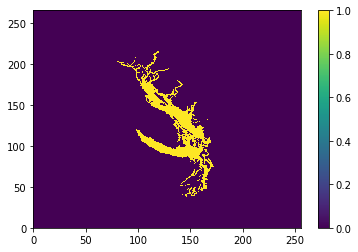

In [91]:
plt.pcolormesh(mask_GEM)
plt.colorbar();

In [99]:
grid_GEM['mask'] = (('y', 'x'), mask_GEM)
small = grid_GEM.drop(['atmpres', 'precip', 'qair', 'solar', 'tair', 'therm_rad', 'u_wind', 'v_wind'])
small = small.drop_dims('time_counter')
small.attrs['Source'] = 'analysis-susan/notebooks/Karyn/MakeGEMmasks.ipynb'

In [100]:
small.attrs['history'] = 'A water mask file based on pre Sep 22, 2011 gemlam file=' + small.attrs['history']

In [101]:
encoding = {var: {'zlib': True} for var in ['nav_lat', 'nav_lon', 'mask']}

In [102]:
small.to_netcdf('GEM_maskfile_for_gem_files_pre_22sep11.pdf', encoding=encoding)

## GEM September 22, 2011 on

In [124]:
grid_GEM = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2012m01d01.nc')

In [125]:
mask_GEM = build_GEM_mask(grid_GEM, grid_NEMO, mask_NEMO.tmask.isel(t=0, z=0))

(266, 256)
0
20
40
60
80
100
120
140
160
180
200
220
240


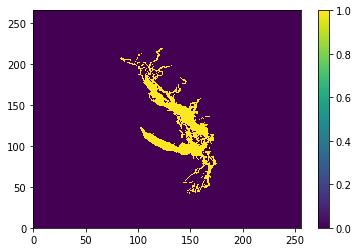

In [126]:
plt.pcolormesh(mask_GEM)
plt.colorbar();

In [127]:
grid_GEM['mask'] = (('y', 'x'), mask_GEM)
small = grid_GEM.drop(['atmpres', 'precip', 'qair', 'solar', 'tair', 'therm_rad', 'u_wind', 'v_wind'])
small = small.drop_dims('time_counter')
small.attrs['Source'] = 'analysis-susan/notebooks/Karyn/MakeGEMmasks.ipynb'

In [128]:
small.attrs['history'] = 'A water mask file based on Sep 22, 2011 on gemlam file=' + small.attrs['history']

In [129]:
encoding = {var: {'zlib': True} for var in ['nav_lat', 'nav_lon', 'mask']}
small.to_netcdf('GEM_maskfile_for_gem_files_22sep11_onward.pdf', encoding=encoding)

## Testing ##

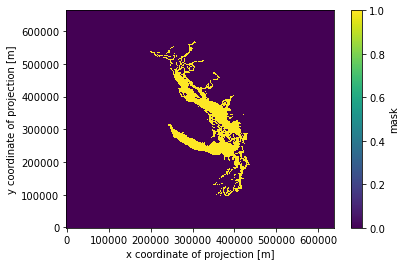

In [121]:
ops_mask = xr.open_dataset('GEM_maskfile_for_ops_files.pdf')
ops_mask.mask.plot()

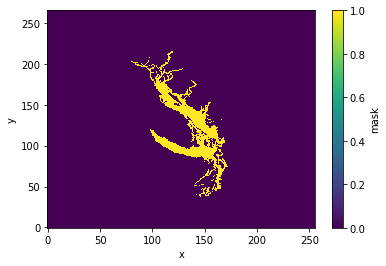

In [122]:
old_gem_mask = xr.open_dataset('GEM_maskfile_for_gem_files_pre_22sep11.pdf')
old_gem_mask.mask.plot()

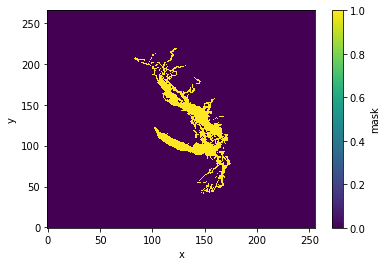

In [130]:
new_gem_mask = xr.open_dataset('GEM_maskfile_for_gem_files_22sep11_onward.pdf')
new_gem_mask.mask.plot()

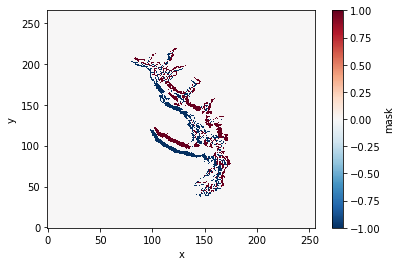

In [132]:
(new_gem_mask.mask - old_gem_mask.mask).plot()